# Parfit Examples

Note:

1. You can either use **bestFit** to automate the steps of the process, and optionally plot the scores over the parameter grid, OR you can do each step in order: 
> `fitModels` -> `scoreModels` -> `plotScores` -> `getBestModel` -> `getBestScore`
2. Be sure to specify ALL parameters in the ParameterGrid, even the ones you are not searching over.

Traditional imports to create our models:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier, LogisticRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, recall_score, mean_squared_error

New imports we need to run our code

In [2]:
from parfit.parfit import bestFit
from parfit.fit import *
from parfit.score import *
from parfit.plot import *

# Classification Models

## Generating data

In [5]:
X_train = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_train = np.asarray([1 if xMax > 1 else 0 for xMax in np.max(X_train, axis=1)])
X_val = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_val = np.asarray([1 if xMax > 1 else 0 for xMax in np.max(X_val, axis=1)])

In [6]:
X_train.head()

,x_exp,x_norm,x_unif
0,0.172602,-1.156632,0.163362
1,0.544490,0.135618,0.867002
2,2.054100,0.207440,0.010499
3,1.042566,-0.516626,0.591736
4,0.230993,0.608967,0.460291


In [7]:
y_train[0:5]

array([0, 0, 1, 1, 0])

## Varying one parameter (LogisticRegression)

In [8]:
lr_grid = {
    'C': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
    'penalty': ['l2'],
    'n_jobs': [-1]
}
lr_paramGrid = ParameterGrid(lr_grid)

In [9]:
lr_models = fitModels(LogisticRegression, lr_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0211s.) Setting batch_size=18.
[Parallel(n_jobs=-1)]: Done   5 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of  21 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.2s finished


In [10]:
lr_scores = scoreModels(lr_models, X_val, y_val, recall_score, 'predict')

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0217s.) Setting batch_size=18.
[Parallel(n_jobs=-1)]: Done   5 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


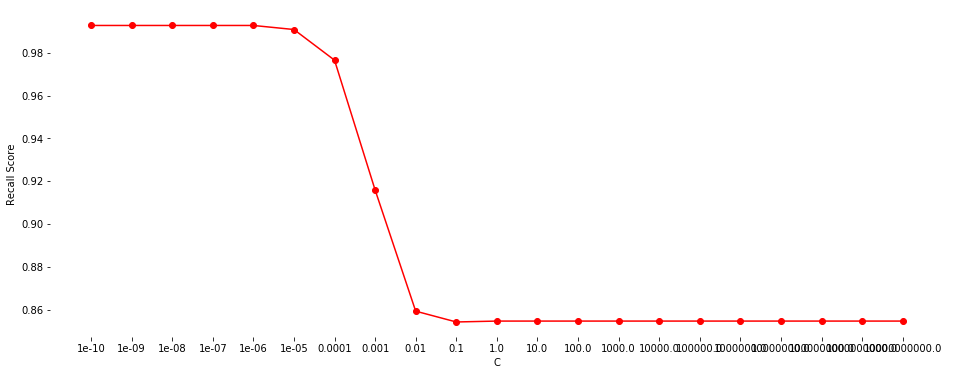

In [11]:
plotScores(lr_scores, lr_paramGrid, 'Recall Score')

In [12]:
getBestModel(lr_models, lr_scores, 'max')

LogisticRegression(C=1e-10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
getBestScore(lr_models, lr_scores, 'max')

0.99265014699706011

Or, in one line of code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0215s.) Setting batch_size=18.
[Parallel(n_jobs=-1)]: Done   5 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of  21 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.2s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0280s.) Setting batch_size=14.
[Parallel(n_jobs=-1)]: Done   5 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of  21 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


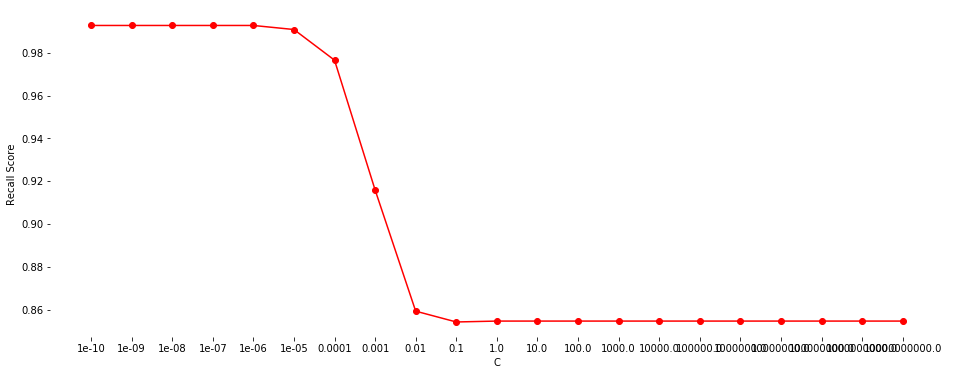

LogisticRegression(C=1e-10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 0.992650146997


In [14]:
lr_bestModel, lr_bestScore, lr_allModels, lr_allScores = bestFit(LogisticRegression, lr_paramGrid, 
                                                   X_train, y_train, X_val, y_val, 
                                                   metric=recall_score, bestScore='max', 
                                                   scoreLabel = 'Recall Score')
print(lr_bestModel, lr_bestScore)

## Varying two parameters

### SGDClassifier (Logistic)

In [23]:
sgd_grid = {
    'alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
    'n_iter': [1e0, 1e1, 1e2, 1e3, 1e4, 1e5],
    'penalty': ['l2'],
    'loss': ['log'],
    'n_jobs': [-1]
}
sgd_paramGrid = ParameterGrid(sgd_grid)

In [24]:
sgd_models = fitModels(SGDClassifier, sgd_paramGrid, X_train, y_train)

/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/an

/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/an

/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/an

/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/an

In [25]:
sgd_scores = scoreModels(sgd_models, X_val, y_val, roc_auc_score)

/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear

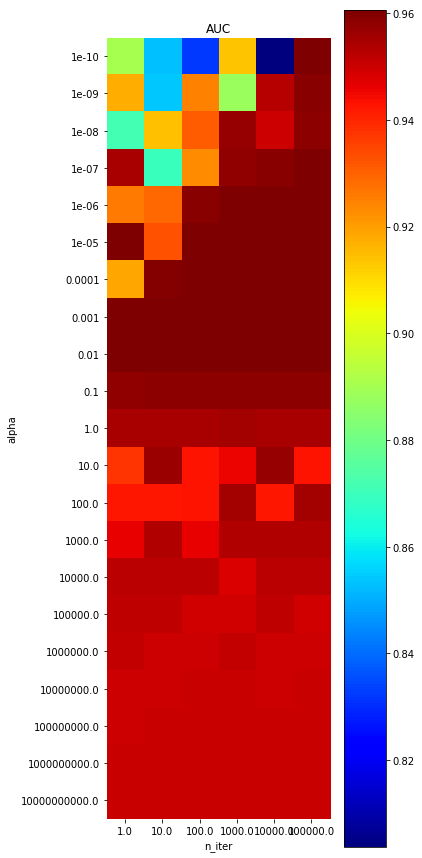

In [26]:
plotScores(sgd_scores, sgd_paramGrid, 'AUC')

In [27]:
getBestModel(sgd_models, sgd_scores, 'max')

SGDClassifier(alpha=1e-06, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=1000.0,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [28]:
getBestScore(sgd_models, sgd_scores, 'max')

0.96063051859221493

Or in one line of code!

-------------FITTING MODELS-------------


/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/an

/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/an

/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/an

/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jmcarpenter/an

-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed: 14.3min finished
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0338s.) Setting batch_size=10.
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear

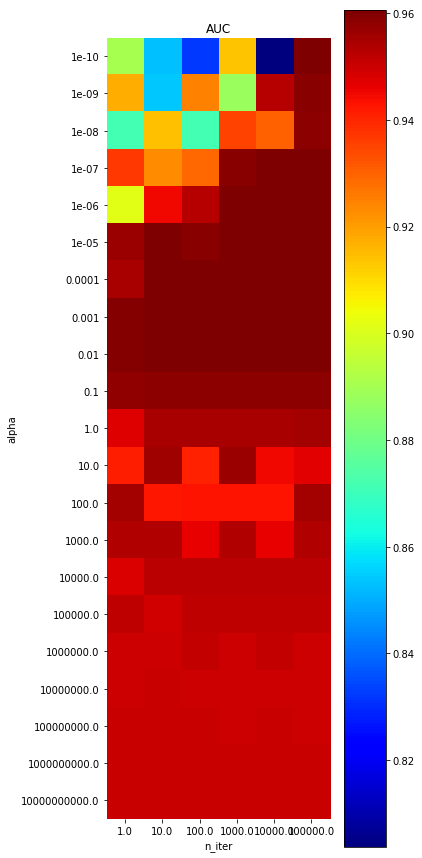

(SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=10.0,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False), 0.96063176221862956)


In [29]:
sgd_bestModel, sgd_bestScore, sgd_allModels, sgd_allScores = bestFit(SGDClassifier, sgd_paramGrid, 
                                                      X_train, y_train, X_val, y_val, 
                                                      metric=roc_auc_score, bestScore='max', 
                                                      scoreLabel = 'AUC')
print(sgd_bestModel, sgd_bestScore)

### RandomForestClassifier

In [30]:
rf_grid = {
    'n_estimators': [50],
    'min_samples_leaf': [1,3,5,10,15,25,50,75,100],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6],
    'n_jobs': [-1]
}
rf_paramGrid = ParameterGrid(rf_grid)

In [31]:
rf_models = fitModels(RandomForestClassifier, rf_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:    2.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:    3.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.3s finished


In [32]:
rf_scores = scoreModels(rf_models, X_val, y_val, roc_auc_score, predictType='predict_proba')

[Parallel(n_jobs=-1)]: Batch computation too fast (0.1588s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  20 out of  45 | elapsed:    0.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.1s finished


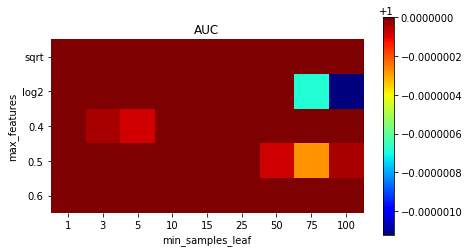

In [33]:
plotScores(rf_scores, rf_paramGrid, 'AUC')

In [34]:
getBestModel(rf_models, rf_scores, 'max')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
getBestScore(rf_models, rf_scores, 'max')

1.0

Or in one line of code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:    2.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:    2.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.0s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1534s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  20 out of  45 | elapsed:    0.6s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.1s finished


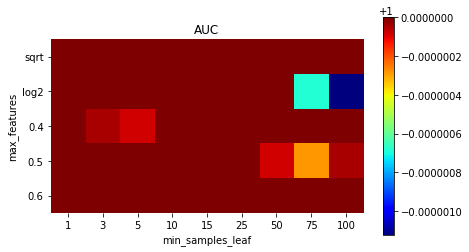

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 1.0000000000000002)


In [36]:
rf_bestModel, rf_bestScore, rf_allModels, rf_allScores = bestFit(RandomForestClassifier, rf_paramGrid, 
                                                   X_train, y_train, X_val, y_val, 
                                                   metric=roc_auc_score, bestScore='max', 
                                                   scoreLabel = 'AUC')
print(rf_bestModel, rf_bestScore)

## Varying three parameters (Gradient Boosting Classifier)

In [73]:
gbm_grid = {
    'learning_rate' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'subsample': np.linspace(0.5,1 ,6),
    'min_samples_leaf': [1,3,5,10,15,25,50]
}
gbm_paramGrid = ParameterGrid(gbm_grid)

In [74]:
gbm_models = fitModels(GradientBoostingClassifier, gbm_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   13.9s
[Paralle

In [79]:
gbm_scores = scoreModels(gbm_models, X_val, y_val, metric=roc_auc_score)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0906s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:    1.3s finished


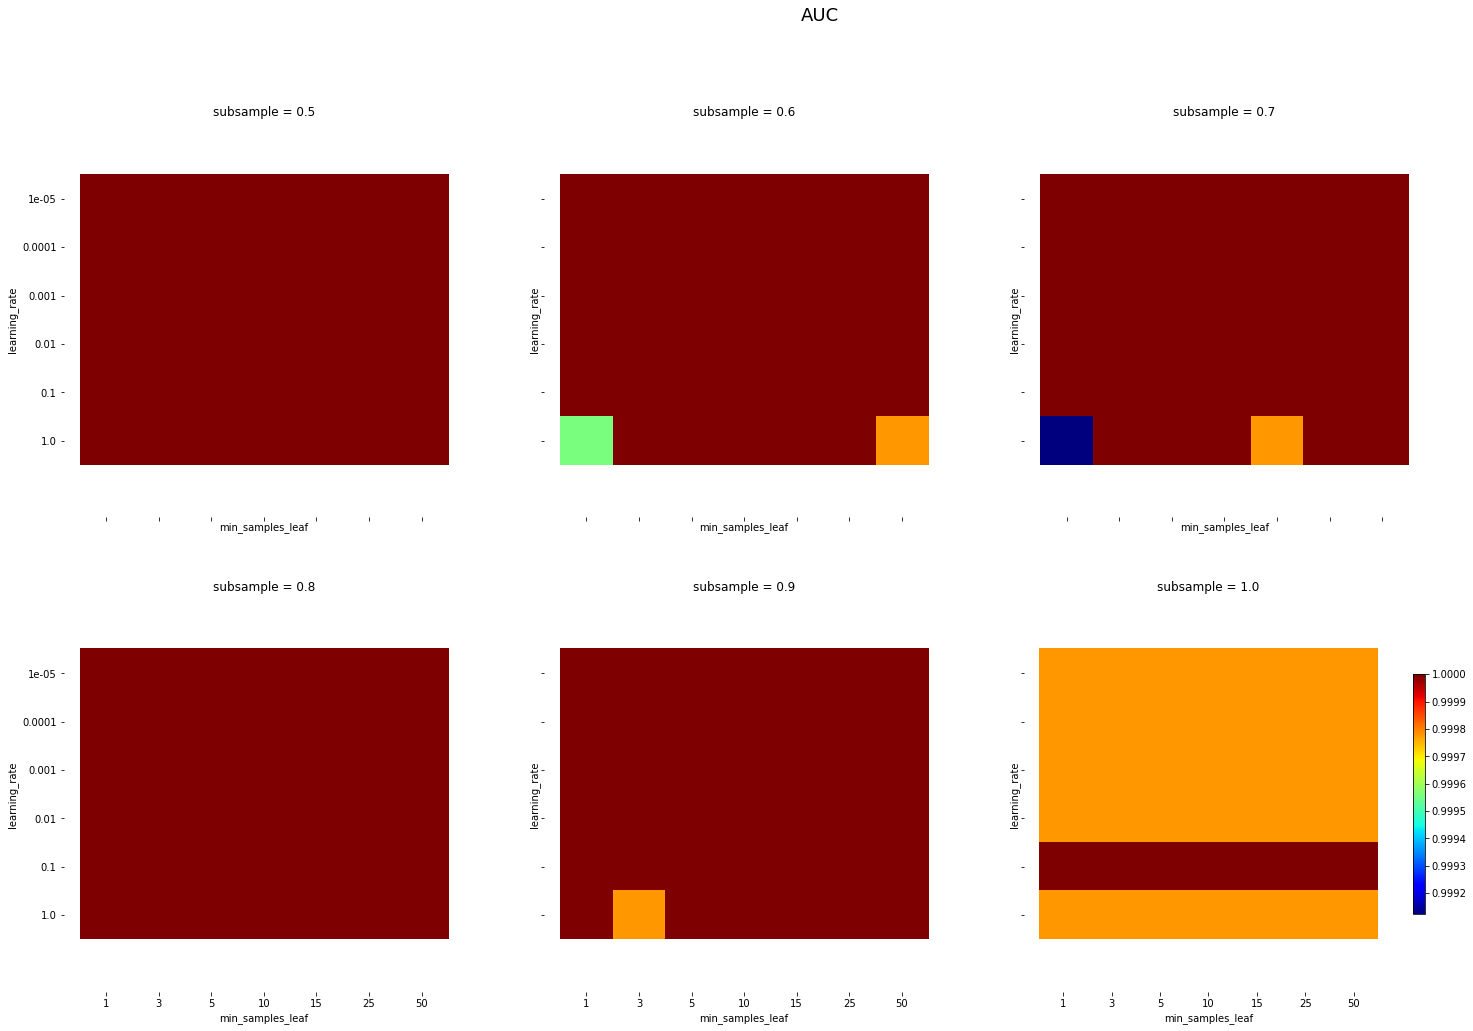

In [80]:
plotScores(gbm_scores, gbm_paramGrid, scoreLabel = 'AUC')

In [81]:
getBestModel(gbm_models, gbm_scores, 'max')

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1e-05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [82]:
getBestScore(gbm_models, gbm_scores, 'max')

1.0

Or, in one line of code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   10.4s
[Paralle

-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0566s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1812s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:    1.3s finished


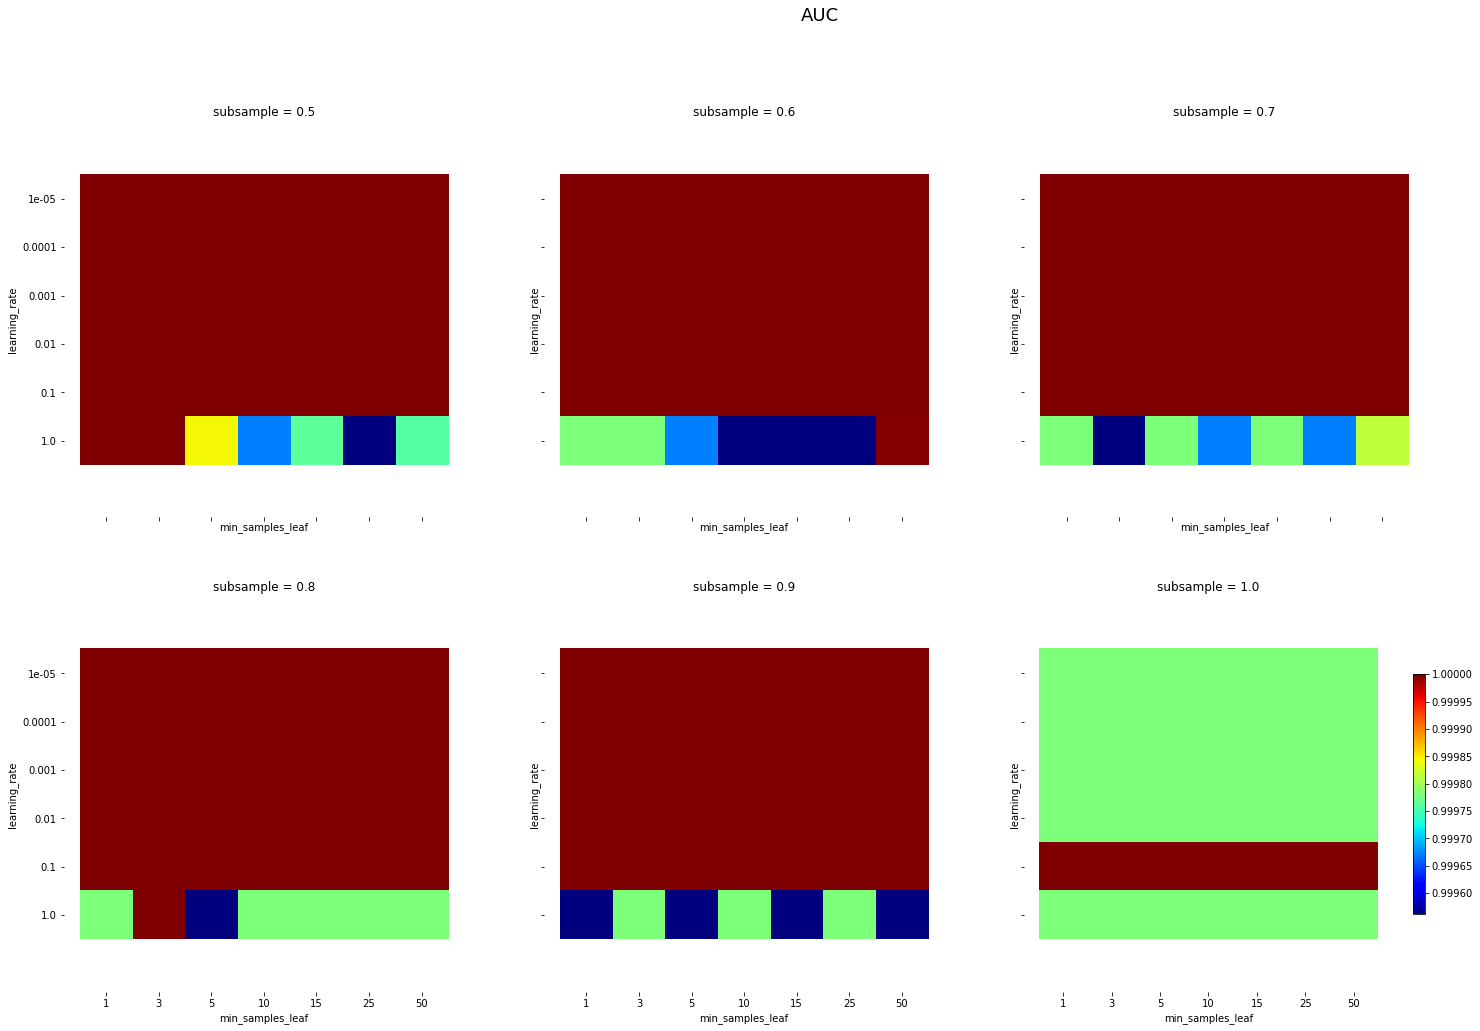

(GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1e-05, loss='ls', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=0.5, verbose=0,
             warm_start=False), 1.0)


In [83]:
gbm_bestModel, gbm_bestScore, gbm_allModels, gbm_allScores = bestFit(GradientBoostingRegressor, gbm_paramGrid,
                                                                    X_train, y_train, X_val, y_val,
                                                                    metric=roc_auc_score, bestScore='max',
                                                                    scoreLabel="AUC")
print(gbm_bestModel, gbm_bestScore)

# Regression Models

## Generating data

In [37]:
X_train = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_train = np.random.normal(0,1,10000)
X_val = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_val = np.random.normal(0,1,10000)

In [38]:
X_train.head()

,x_exp,x_norm,x_unif
0,0.855767,0.640048,-0.340731
1,0.227008,0.074326,0.495430
2,0.144998,-0.760808,0.882449
3,1.164979,-0.352291,0.289173
4,0.964570,-0.701148,0.631399


In [39]:
y_train[0:5]

array([ 0.52915087,  1.60444064,  0.32001216,  0.31063105,  0.46017637])

## Varying one parameter (Ridge Regression)

In [40]:
ridge_grid = {
    'alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
}
ridge_paramGrid = ParameterGrid(ridge_grid)

In [41]:
ridge_models = fitModels(Ridge, ridge_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0138s.) Setting batch_size=28.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


In [42]:
ridge_scores = scoreModels(ridge_models, X_val, y_val, mean_squared_error)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0177s.) Setting batch_size=22.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.2s finished


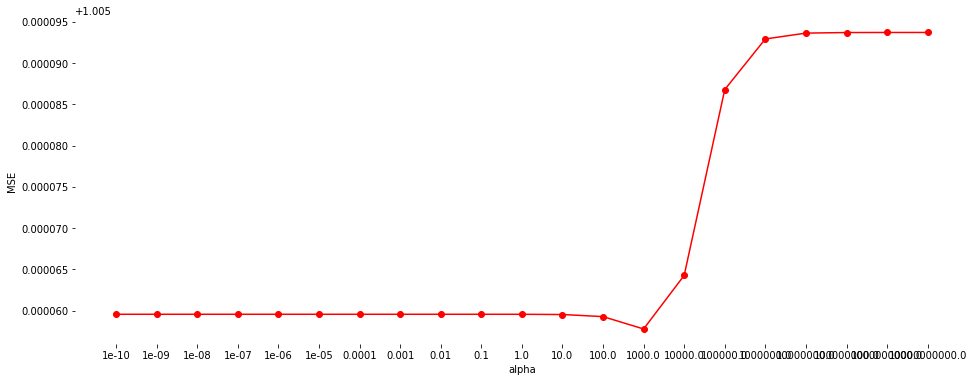

In [43]:
plotScores(ridge_scores, ridge_paramGrid, "MSE")

In [44]:
getBestModel(ridge_models, ridge_scores, 'min')

Ridge(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [45]:
getBestScore(ridge_models, ridge_scores, 'min')

1.0050577878509313

Or in one line of code!

-------------FITTING MODELS-------------
-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0086s.) Setting batch_size=46.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0125s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.1s remainin

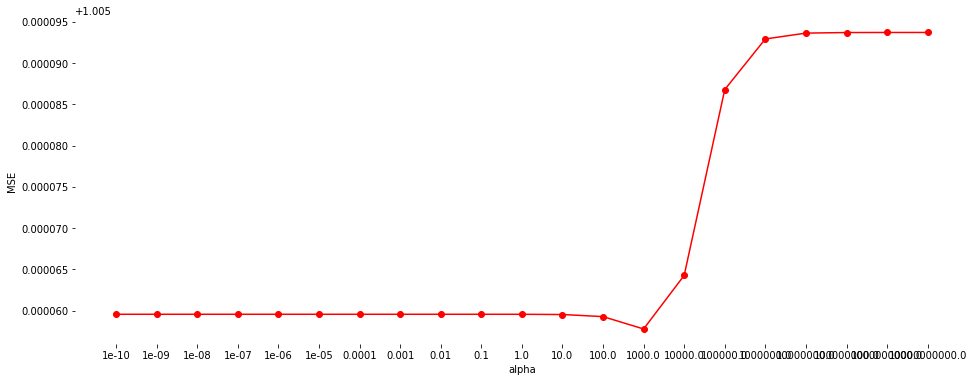

(Ridge(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001), 1.0050577878509313)


In [46]:
ridge_bestModel, ridge_bestScore, ridge_allModels, ridge_allScores = bestFit(Ridge, ridge_paramGrid, 
                                                            X_train, y_train, X_val, y_val, 
                                                            metric=mean_squared_error, bestScore='min', 
                                                            scoreLabel = 'MSE')
print(ridge_bestModel, ridge_bestScore)

## Varying two parameters

### ElasticNet

In [47]:
en_grid = {
    'alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
    'l1_ratio': np.linspace(0,1,21)
}
en_paramGrid = ParameterGrid(en_grid)

In [48]:
en_models = fitModels(ElasticNet, en_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0327s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 243 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]:

In [49]:
en_scores = scoreModels(en_models, X_val, y_val, mean_squared_error)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0155s.) Setting batch_size=24.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    1.0s finished


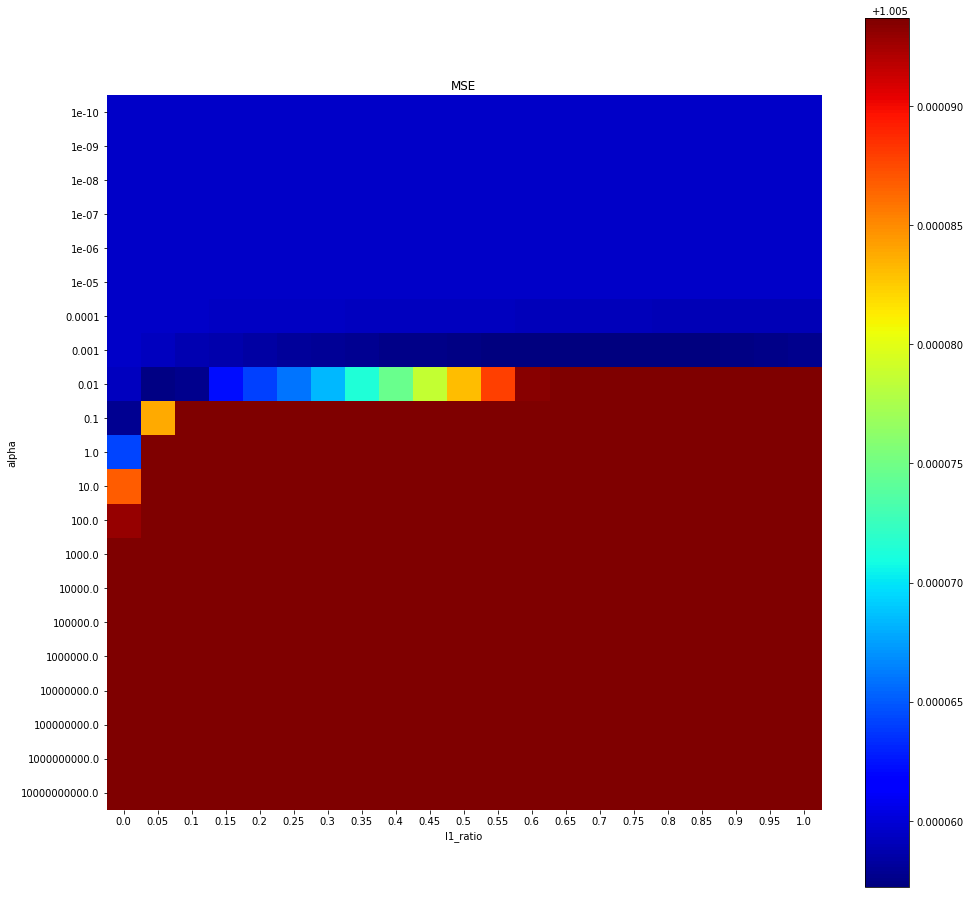

In [50]:
plotScores(en_scores, en_paramGrid, "MSE")

In [51]:
getBestModel(en_models, en_scores, 'min')

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
      l1_ratio=0.70000000000000007, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
getBestScore(en_models, en_scores, 'min')

1.0050572119278625

Or in one line of code!

-------------FITTING MODELS-------------


/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0279s.) Setting batch_size=14.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:    1.0s
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordin

-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0150s.) Setting batch_size=26.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1654s.) Setting batch_size=62.
[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    0.8s finished


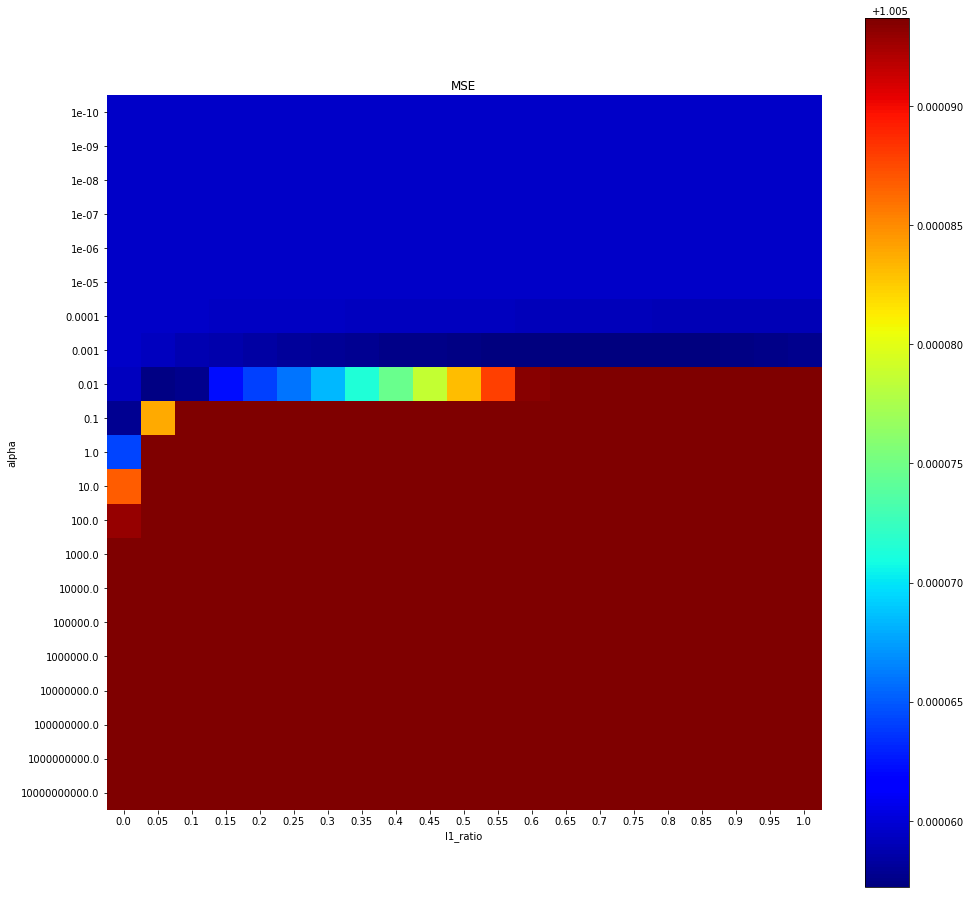

(ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
      l1_ratio=0.70000000000000007, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), 1.0050572119278625)


In [53]:
en_bestModel, en_bestScore, en_allModels, en_allScores = bestFit(ElasticNet, en_paramGrid, 
                                                   X_train, y_train, X_val, y_val, 
                                                   metric=mean_squared_error, bestScore='min',
                                                   scoreLabel = 'MSE')
print(en_bestModel, en_bestScore)

### RandomForestRegressor

In [54]:
rf_grid = {
    'n_estimators': [50],
    'min_samples_leaf': [1,3,5,10,15,25,50,75,100,125,150,175,200,250,300,400,500],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6],
    'n_jobs': [-1]
}
rf_paramGrid = ParameterGrid(rf_grid)

In [55]:
rfreg_models = fitModels(RandomForestRegressor, rf_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  79 out of  85 | elapsed:    8.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    8.8s finished


In [56]:
rfreg_scores = scoreModels(rfreg_models, X_val, y_val, mean_squared_error)

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  79 out of  85 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    2.2s finished


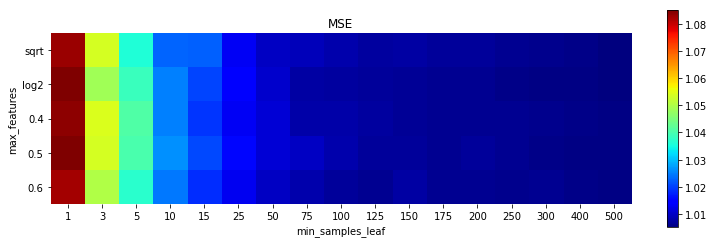

In [57]:
plotScores(rfreg_scores, rf_paramGrid, "MSE")

In [58]:
getBestModel(rfreg_models, rfreg_scores, 'min')

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=500, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
getBestScore(rfreg_models, rfreg_scores, 'min')

1.0050847272837609

Or in one line of code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  79 out of  85 | elapsed:    8.9s remaining:    0.7s


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  79 out of  85 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    2.2s finished


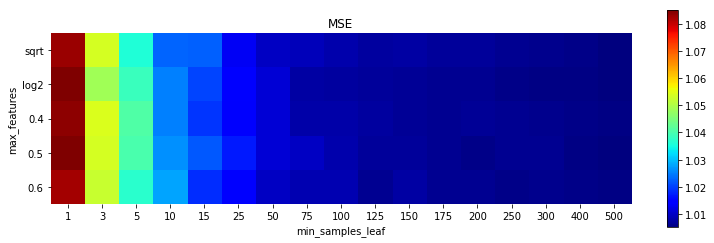

(RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=500, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 1.0050847272837609)


In [60]:
rfreg_bestModel, rfreg_bestScore, rfreg_allModels, rfreg_allScores = bestFit(RandomForestRegressor, rf_paramGrid, 
                                                            X_train, y_train, X_val, y_val, 
                                                            metric=mean_squared_error, bestScore='min',
                                                            scoreLabel = 'MSE')
print(rfreg_bestModel, rfreg_bestScore)

## Varying three parameters (Gradient Boosting Regressor)

In [62]:
gbm_grid = {
    'learning_rate' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'subsample': np.linspace(0.5,1 ,6),
    'min_samples_leaf': [1,3,5,10,15,25,50]
}
gbm_paramGrid = ParameterGrid(gbm_grid)

In [63]:
gbmreg_models = fitModels(GradientBoostingRegressor, gbm_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   12.3s
[Paralle

In [64]:
gbmreg_scores = scoreModels(gbmreg_models, X_val, y_val, metric=mean_squared_error)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0552s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:    1.3s finished


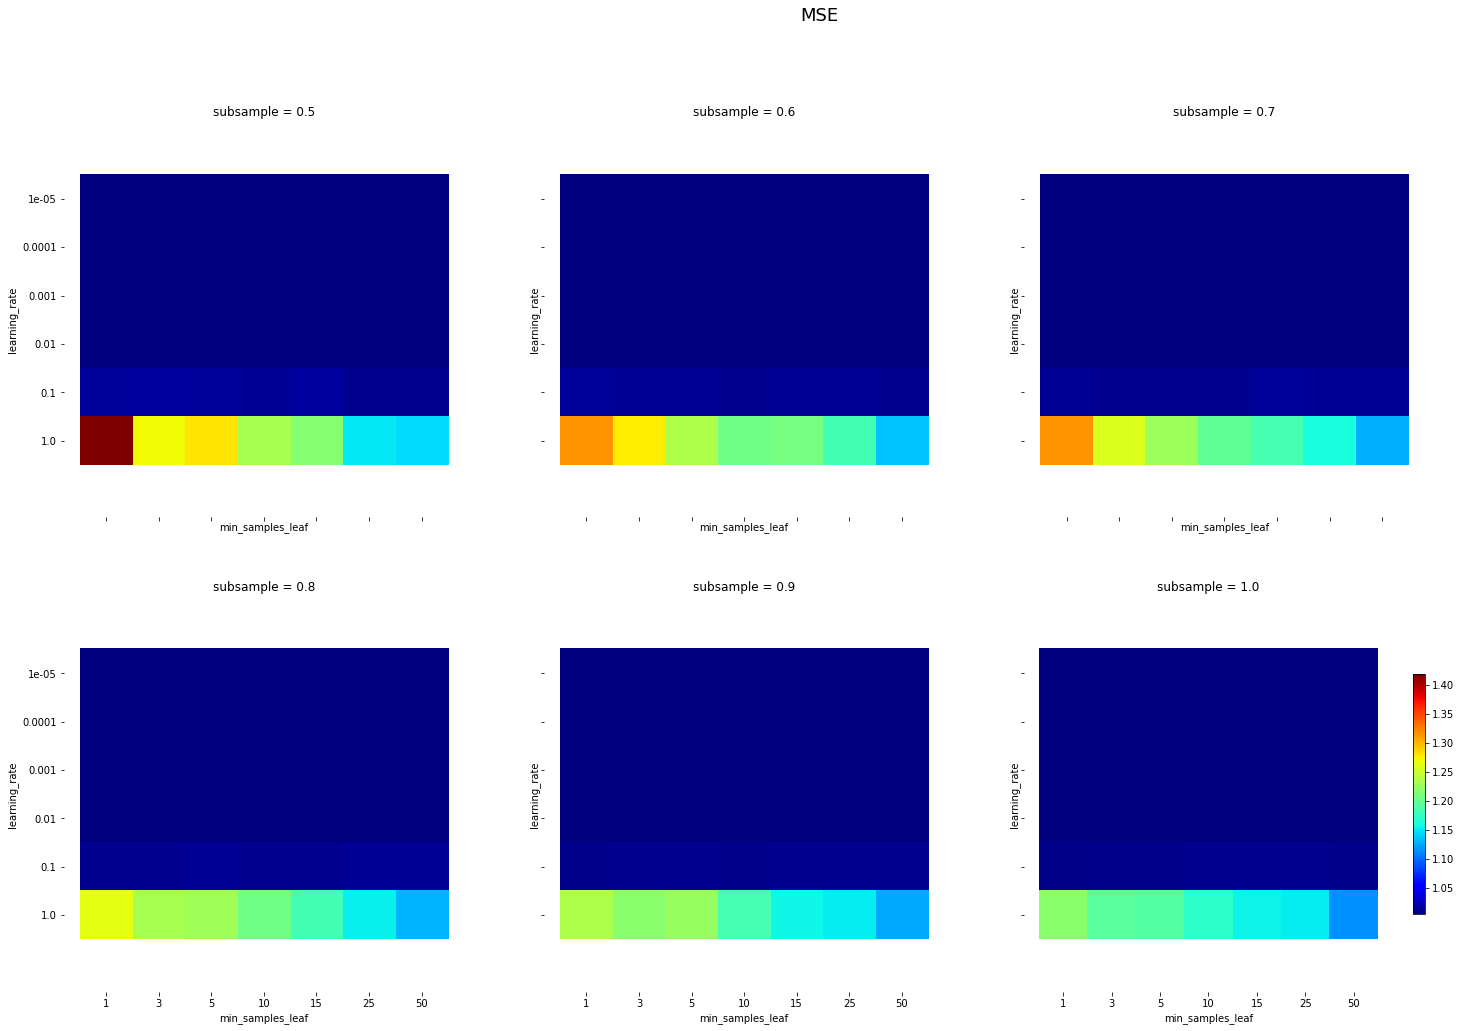

In [65]:
plotScores(gbmreg_scores, gbm_paramGrid, scoreLabel = 'MSE')

In [66]:
getBestModel(gbmreg_models, gbmreg_scores, 'min')

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.0001, loss='ls', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [68]:
getBestScore(gbmreg_models, gbmreg_scores, 'min')

1.0050779961979672

Or, in one line code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   12.3s
[Paralle

-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0759s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1873s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:    1.4s finished


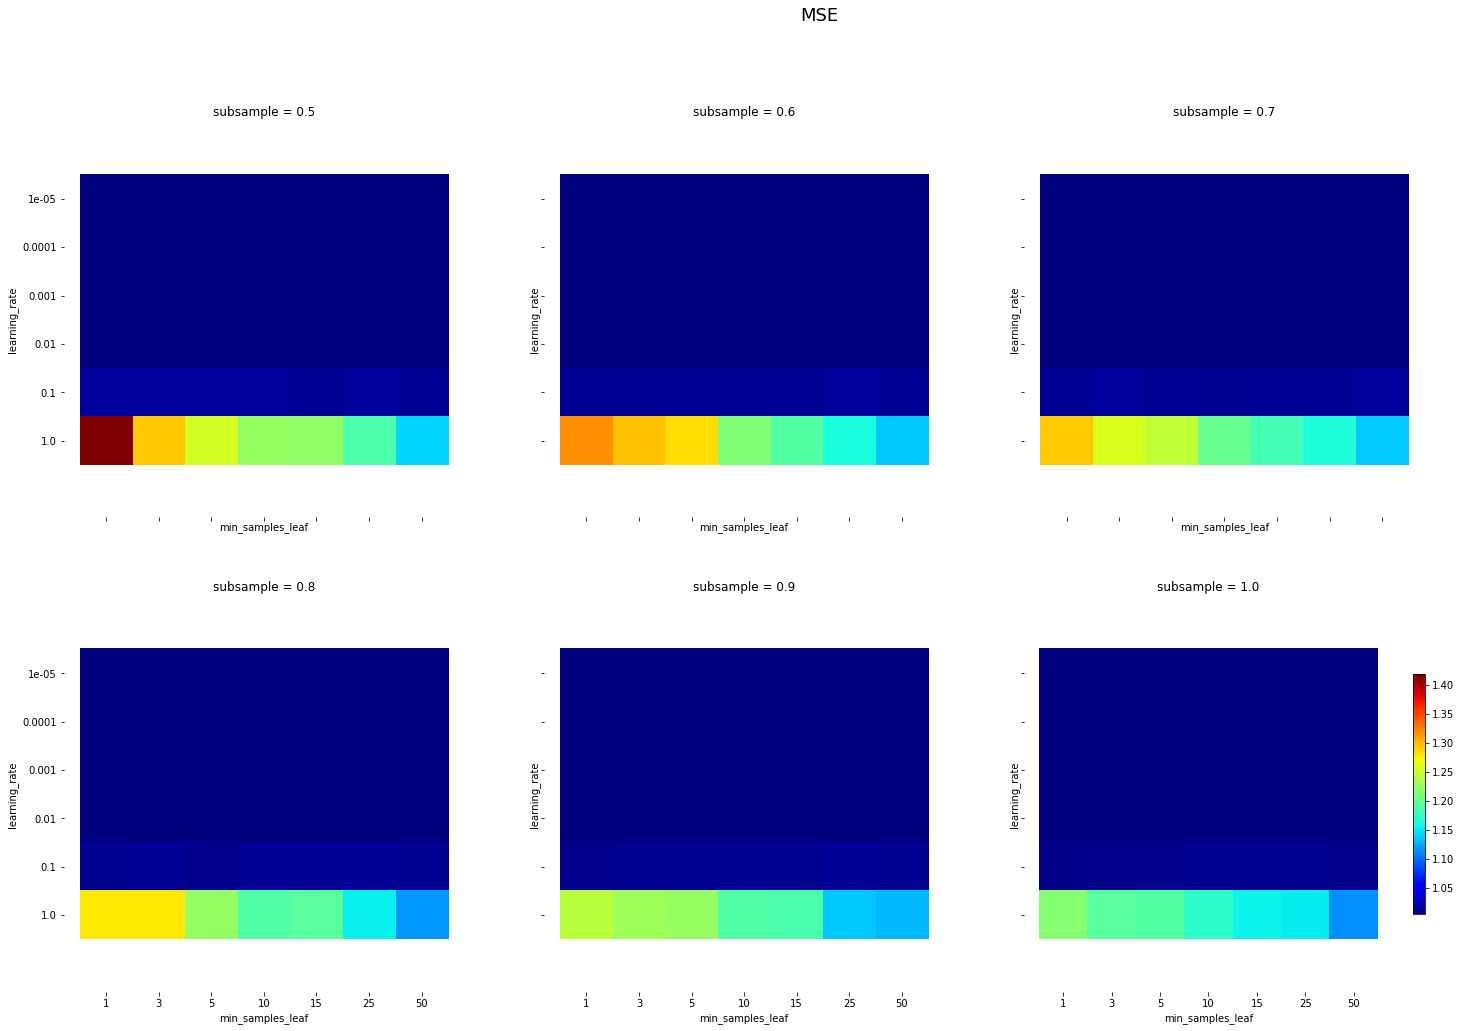

(GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.0001, loss='ls', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False), 1.0050779961979672)


In [70]:
gbmreg_bestModel, gbmreg_bestScore, gbmreg_allModels, gbmreg_allScores = bestFit(GradientBoostingRegressor, gbm_paramGrid,
                                                                    X_train, y_train, X_val, y_val,
                                                                    metric=mean_squared_error, bestScore='min',
                                                                    scoreLabel="MSE")
print(gbmreg_bestModel, gbmreg_bestScore)